# Extracción de hojas frutales

## Librerias:

Tratamiento de matrices:

In [4]:
import numpy as np

Tratamiento de archivos:

In [7]:
import os
from os import listdir

Tratamiento de imagenes:

In [9]:
from PIL import Image
from skimage.io import imread
import skimage.filters as filters
import cv2
import skimage.morphology as morph
import skimage
import skimage.io

Generación de imagenes:

In [12]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

Especializados en imagenes de plantas:

In [15]:
from plantcv import plantcv as pcv

## Funciones miscelanias

Graficar imagenes:

In [16]:
def plot(imagen,color='black',title=None,cmapa='gray',pic = False,subplot  = (1,1,1),vmin = 0, vmax = 255):
    if pic == True:
        plt.figure(figsize=(15,8))
    plt.subplot(subplot[0],subplot[1],subplot[2])
    plt.axis('off')
    plt.imshow(imagen,cmap = cmapa,vmin = vmin, vmax = vmax)
    plt.title(title,color = color)

Conversión a escala de grises:

In [17]:
def load_gray_image(image_path):
    
    coloured_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return gray_image

Generación de histogramas:

In [19]:
def plot_img_hist (image,title,subrows,subcols,num,size1,size2):
    fig = plt.figure(figsize=(size1,size2))
    plt.subplot(subrows,subcols,num)
    plt.imshow(image,cmap='gray');plt.title(title)
    color = ('r','g','b')
    plt.subplot(subrows,subcols,num+1)
    plt.title(" Histograma " + title)

    if len(image.shape) > 2 :            
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        hist,bins = np.histogram(image.ravel(),256,[0,256])
        plt.plot(hist, color='gray' )
        plt.xlim([0,256])

Threshold:

In [21]:
def threshold(img,tipo,t):
    _ , image = cv2.threshold(img,t,255,tipo)
    lista = {0:'THRESH_BINARY',
             1:'THRESH_BINARY_INV',
             2:'THRESH_TRUNC',
             3:'THRESH_TOZERO',
             4:'THRESH_TOZERO_INV',
             8:'THRESH_OTSU',
             16:'THRESH_TRIANGLE',
             7:'THRESH_MASK'    }
    plot(image, pic = True,subplot = (1,2,2),title = 'Imagen binarizada con tipo de umbralización {}.'.format(lista[tipo]))
    plot(img,subplot = (1,2,1), title= f'Imagen filtrada')
    return _

## Espacios de color RGB:

Definición de vectores de color:

In [25]:
# Rojo
abc_r = (1,0,0)
# Verde
abc_g = (0,1,0)
# Azul
abc_b = (0,0,1)

files = listdir('DataSet/train')

Creación de imagenes en cada canal RGB:

In [32]:
files = listdir('DataSet/train')
#print(files[0:20])
for name in files:
    img_or = cv2.cvtColor(cv2.imread(f'DataSet/train/{name}'), cv2.COLOR_BGR2RGB)
    imagen_r = np.dot(img_or,abc_r)
    imagen_g = np.dot(img_or,abc_g)
    imagen_b = np.dot(img_or,abc_b)
    cv2.imwrite(f'DataSet/Canales/R/{name}',imagen_r)
    cv2.imwrite(f'DataSet/Canales/G/{name}',imagen_g)
    cv2.imwrite(f'DataSet/Canales/B/{name}',imagen_b)

Resultado obtenenido en separación de canales:

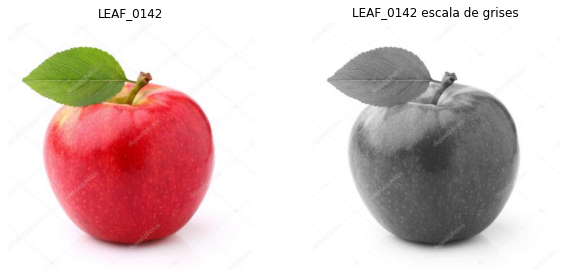

In [33]:
## Comprobamos las funciones de importacion y gráficar
imagen = '0142'
carpeta = 'DataSet'
img_test = cv2.cvtColor(cv2.imread(f'{carpeta}/train/LEAF_{imagen}.jpg'), cv2.COLOR_BGR2RGB)
img_gray = load_gray_image(f'{carpeta}/train/LEAF_{imagen}.jpg')
plt.figure(figsize=(10,10))
plot(img_test,subplot=(2,2,1) ,title=f'LEAF_{imagen}')
plot(img_gray,subplot=(2,2,2) ,title=f'LEAF_{imagen} escala de grises')

Creación de histogramas a partir de las imagenes del dataset:

In [31]:
for name in files[0:30]:
        img_or = cv2.imread(f'DataSet/train/{name}')
        plot_img_hist(img_or,f'{name}',1,2,1,10,5)
        plt.savefig(f'DataSet/Histograms/{name}')
        plt.close()